# Assigment 3
### 188.413 Self-Organizing Systems


Topic D: label SOM 1

  Rainer David, 51850574
	de Lambertye Grégoire, 12202211
	Gugleta Marko, 12016483

The aim of this assignment is to  print the names of the n attributes per unit/cluster that show the lowest variance and/or the highest mean values within a specific unit or cluster, as text on the map units / clusters

Full working source code available at: https://github.com/DaveRainer/SOS_ex03_PySOMVis

In [30]:
import numpy as np

# SOM training  

We used the 2 datasets *Chainlink* and *10-Clusters* and trained 2 SOMs for each dataset.
One SOM (small) is 10x10 for 10'000 iterations. The second SOM is 100x60 and trained for 100'000 iteration with an increased signma (nieghborhood distance parameter).

We first visualize the SOM and discuss some characteristics of the dataset.
Later we will use the trained SOMs for evaluation of the chosen visualization technique.

## 10 clusters

In [35]:
from pysomvis import PySOMVis
from SOMToolBox_Parse import SOMToolBox_Parse
from minisom import MiniSom

idata_10cluster = SOMToolBox_Parse("datasets/10clusters/10clusters.vec").read_weight_file()
classes_10clusters = SOMToolBox_Parse("datasets/10clusters/10clusters.cls").read_weight_file()

In [54]:
som_10cluster_small = MiniSom(10, 10, 10)
som_10cluster_small.train(idata_10cluster['arr'], 10000, random_order=True, verbose=True)

weights_small_10cluster = som_10cluster_small.get_weights()

vis_10clusters_small = PySOMVis(
    weights=weights_small_10cluster,
    input_data=idata_10cluster['arr'],
    classes=classes_10clusters["arr"][:,1],
)
vis_10clusters_small._mainview

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6068331444039985


Column
    [0] Column
        [0] Column
            [0] Row(margin=(5, 10), width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap, height=500, sizing_mode='fixed', width=500)
            [1] Row
                [0] Column
                    [0] Column(margin=(5, 10), name='Component Planes')
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=9, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

A visualization like U-Matrix can be used to view cluster structures on the SOM.
At such a low resolution, the cluster boundaries are not clearly visible and the true number of clusters not obvious.
going through the PySOMVis clustering optionsl reveals that there are 6 easily separable clusters encoded onto this SOM.

In [58]:
som_10cluster_large = MiniSom(100, 60, idata_10cluster['vec_dim'], sigma=5)
som_10cluster_large.train(idata_10cluster['arr'], 100000, random_order=True, verbose=True)

weights_large_10cluster = som_10cluster_large.get_weights()

vis_10clusters_large = PySOMVis(
    weights=weights_large_10cluster,
    input_data=idata_10cluster['arr'],
    classes=classes_10clusters["arr"][:,1],
)
vis_10clusters_large._mainview

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.1844054661232669


Column
    [0] Column
        [0] Column
            [0] Row(margin=(5, 10), width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap, height=500, sizing_mode='fixed', width=500)
            [1] Row
                [0] Column
                    [0] Column(margin=(5, 10), name='Component Planes')
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=9, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

At this resolution we can clearly see the 10 different cluster in the dataset (e.g. by looking at the U-Matrix visualiuation).
Although it is also apparent, that there are 2 groups of 3 clusters that are harder to separate.
The build in clustering of PySOMVis struggles with properly splitting the 10 preconstructed clusters.

## Chainlink

In [42]:
idata_chainlink = SOMToolBox_Parse("datasets/chainlink/chainlink.vec").read_weight_file()
classes_chainlink = SOMToolBox_Parse("datasets/chainlink/chainlink.cls").read_weight_file()

In [61]:
som_chainlink_small = MiniSom(10, 10, idata_chainlink['vec_dim'], sigma=3)
som_chainlink_small.train(idata_chainlink['arr'], 100000, random_order=True, verbose=True)

vis_chainlink_small = PySOMVis(
    weights=som_chainlink_small.get_weights(),
    input_data=idata_chainlink['arr'],
    classes=classes_chainlink["arr"][:,1],
)
vis_chainlink_small._mainview

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.11976658634991995


Column
    [0] Column
        [0] Column
            [0] Row(margin=(5, 10), width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap, height=500, sizing_mode='fixed', width=500)
            [1] Row
                [0] Column
                    [0] Column(margin=(5, 10), name='Component Planes')
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=2, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

At this resolution we can see 2 clusters in the shape of bent lines stretching across the SOM.
A helpful visualization for this is for example the Sky Metaphore.

In [62]:
som_chainlink_large = MiniSom(100, 60, idata_chainlink['vec_dim'], sigma=15.0)
som_chainlink_large.train(idata_chainlink['arr'], 100000, random_order=True, verbose=True)

vis_chainlink_large = PySOMVis(
    weights=som_chainlink_big.get_weights(),
    input_data=idata_chainlink['arr'],
    classes=classes_chainlink["arr"][:,1],
)
vis_chainlink_large._mainview

 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.05120851190237934


Column
    [0] Column
        [0] Column
            [0] Row(margin=(5, 10), width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap, height=500, sizing_mode='fixed', width=500)
            [1] Row
                [0] Column
                    [0] Column(margin=(5, 10), name='Component Planes')
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=2, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

The 2 Rings are clearly visible now.
AS expected, they appear as 2 long bands of datapoints due to the topographical error that the SOM produces while training.

## Clustering

The aim of this section is to get together similar units into clusers. We use KMeans for the SOM of the 10 clusters dataset and group the units into the expected 10 clusters. The clustering of the chainlink SOM is done with a hierarchical clustering, we use a distance of 1 on the Large SOM, which leads to 10 clusters as well.
For the chainlinks we focus on the small SOM only.

The implementation is based on the widely used scipy library.

### KMeans

KMeans clustering relies on distance between units and is not deterministic 

In [63]:
from sklearn.cluster import KMeans


def find_clusters_KMeans(data, k_clusters=3):
    """
    Return a KMeans object fitted on the given data for a defined amount of clusters
    """
    km_classifier = KMeans(n_clusters=k_clusters, random_state=42)
    initial_labels = km_classifier.fit_predict(data)
    km_classifier.fit(data, initial_labels)

    return km_classifier

In [74]:
import warnings

warnings.filterwarnings("ignore")
weight_small_10cluster = weights_small_10cluster.flatten().reshape(100, 10)
weight_large_10cluster = weights_large_10cluster.flatten().reshape(6000, 10)

# Predict the cluster
km_classifier_small = find_clusters_KMeans(weight_small_10cluster, k_clusters=10)  # Initialize KMeans
km_classifier_large = find_clusters_KMeans(weight_large_10cluster, k_clusters=10)
kMean_clusters_small = km_classifier_small.predict(weight_small_10cluster)  # Predict clusters
kMean_clusters_large = km_classifier_large.predict(weight_large_10cluster)

### Hierarchical clustering

Hierarchical clustering enables to quantify the distance between the units and then cluster them with respect to a thershold. 

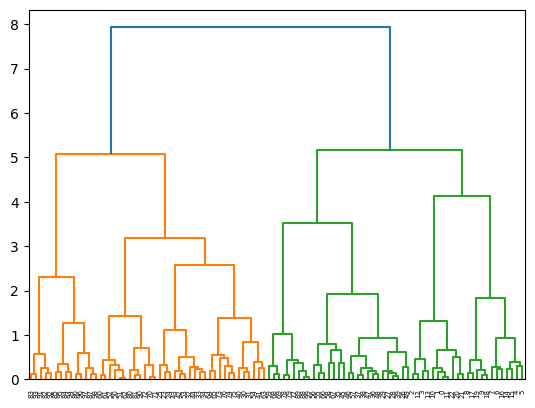

In [241]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Compute the hierarchical proximity
weight_small_chainlink = som_chainlink_small.get_weights().flatten().reshape(100, 3)

linkage_data = linkage(weight_small_chainlink, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [255]:
hierarchical_clusters = fcluster(linkage_data, 1.153)

## Extracting High Mean Low Variance Attributes

Now we introduce the extraction of low variance, high mean attributes.

When analyzing data, it is often interesting to know which attributes are charachteristic for certain clusters.
Characteristic attributes are those that are rather homogenous across datapoints in the cluster, ergo those that show a low variance.
In addition to this, it can also be valuable to take a look at attributes that have a high mean value inside of a cluster.
This however depends on the type of attribute that is being analysed.

This type of analysis can also be done for each unit of the SOM resulting in a more finegrained view.

### Various helper functions

In [69]:
def normalize_data(data):
    """
    Performs zero mean unit variance normalization on the given datapoints.
    Allows inter attribute comparison.

    :param data: The np array containting the data points
    :return: an np array containing normalized datapoints
    """
    normalized_data = np.copy(data)
    means = np.mean(data, axis=0)
    std_diviations = np.std(data, axis=0)
    dimensions = data.shape[1]
    for i in range(0, dimensions):
        normalized_data[:, i] = normalized_data[:, i] - means[i]
        normalized_data[:, i] = normalized_data[:, i] / std_diviations[i]
    return normalized_data


def assign_bmus(data, units):
    """
    Assigns each datapoint to its best matching unit.

    :param data: np array of datapoints
    :param units: np array containg the weight vectors for all units
    :return: a list containing an entry per SOM unit with the indexes of all datapoints for which the unit is the BMU
    """
    # Init assignment list
    bmu_assignments = []
    for i in range(0, units.shape[0]):
        bmu_assignments.append([])

    # Add index to closest unit's list
    for idx, data_point in enumerate(data):
        dists = np.linalg.norm(units - data_point, axis=1)
        min_idx = np.argmin(dists)
        bmu_assignments[min_idx].append(idx)

    return bmu_assignments


def get_means(points):
    if len(points) == 0:
        return None
    elif len(points) == 1:
        return points[0]
    else:
        return np.mean(np.array(points), axis=0)


def get_standard_deviations(points):
    if len(points) == 0:
        return None
    elif len(points) == 1:
        return np.zeros_like(points[0])
    else:
        return np.std(np.array(points), axis=0)


# Avoid division by 0 for fully homogenous attributes
MIN_VARIANCE = 0.0000001

def replace_with_min_variance(array):
    res = []
    for i in array:
        if i < MIN_VARIANCE:
            res.append(MIN_VARIANCE)
        else:
            res.append(i)
    return np.array(res)


def flatten(xss):
    return [x for xs in xss for x in xs]

### Per Unit

We first introduce a mapping per unit.

In order to compare the variances and means of the different attributes, we first perform a zero mean, unit variance normalization.
This is necessary to be able to reason about different attributes using different unit scales in the same manner.

Then we determine the Best Matching Unit (BMU) for each datapoint and assign these datapoints to their units to be later iterated over.

Lastly we compute mean and variance of attribute over the BMU assignments and score the attributes based on the results.

We decided to compute the score based on the addition of the mean and the inverse variance.
Other scoring schemes can be envisioned, but this one seemed most flexible if the data it will be applied on is fully unknown.
Additionally we introduce 2 factors to allow a more finegrained control over the impact of mean and variance on the final scoring of the attributes.
This is in contrast to the paper that was introduced during the lecture, where a mean threshold was instead used on a varaince only ranking. However, due to the focus on text as input data, that this paper had, we decided to opt for this more generic approach instead, because the semantics of 0 value attributes of datapoints are not always defined likle they are for large high dimensional text input.

We decided to not consider neighborhoods and only look at BMU assignments. Therefore interpolating units without data mapped to them will not have attribtues assigned (empty).

In [104]:
def get_high_mean_low_variance_attributes_per_unit(
        data,
        units,
        num_attributes,
        mean_factor,
        variance_factor,
):
    """
    Assigns each unit the specified number of high mean low variance attributes.
    Attributes are given as dimension ids.
    Name mapping needs to happen saparately.
    Interpolating unit without Data are assigned an empty array.

    :param data: the unnormalized datapoints
    :param units: the unnormalized weight vectors of the SOM units
    :param num_attributes: the max number of attributes returned for each unit
    :param mean_factor: controls impact of mean on attribute score
    :param variance_factor: controls impact of variance on attribute score
    :return: a list of attribute assignments per unit
    """
    if units.ndim == 3:
        # SOM units given as 2d arrangement -> flatten first
        units = np.reshape(units, (units.shape[0] * units.shape[1], units.shape[2]))
    elif units.ndim > 3:
        raise Exception("invalid dimensionality of SOM. Either supply units as 1D or 2D array")    
    
    if data.shape[1] != units.shape[1]:
        raise Exception("your datapoints and SOM units are not of the same dimension")
        
    bmu_assignments = assign_bmus(data, units)

    norm_data = normalize_data(data)
    normalized_assignments = [[norm_data[p] for p in a] for a in bmu_assignments]

    means = [get_means(a) for a in normalized_assignments]
    std_divs = [get_standard_deviations(a) for a in normalized_assignments]

    attrs = []
    for i in range(0, units.shape[0]):
        unit_means = means[i]
        unit_std_divs = std_divs[i]

        if unit_means is None or unit_std_divs is None:
            # interpolating unit -> do not label
            attrs.append(np.array([]))
            continue

        scores = (unit_means * mean_factor) + ((1.0 / replace_with_min_variance(unit_std_divs)) * variance_factor)

        attributes_to_take = num_attributes if num_attributes <= scores.shape[0] else scores.shape[0]
        min_attrs = np.argpartition(scores, attributes_to_take)
        attrs.append(min_attrs[:attributes_to_take])

    return attrs

We introduce convenience functions that only focus on one of the 2 aspects respectively

In [71]:
def get_high_mean_attributes_per_unit(
        data,
        units,
        num_attributes,
):
    """
    Assigns each unit the specified number of high mean attributes.
    Attributes are given as dimension ids.
    Name mapping needs to happen saparately.
    Interpolating unit without Data are assigned an empty array.

    :param data: the unnormalized datapoints
    :param units: the unnormalized weight vectors of the SOM units
    :param num_attributes: the max number of attributes returned for each unit
    :return: a list of attribute assignments per unit
    """
    return get_high_mean_low_variance_attributes_per_unit(data, units, num_attributes, 1, 0)


def get_low_variance_attributes_per_unit(
        data,
        units,
        num_attributes,
):
    """
    Assigns each unit the specified number of low variance attributes.
    Attributes are given as dimension ids.
    Name mapping needs to happen saparately.
    Interpolating unit without Data are assigned an empty array.

    :param data: the unnormalized datapoints
    :param units: the unnormalized weight vectors of the SOM units
    :param num_attributes: the max number of attributes returned for each unit
    :return: a list of attribute assignments per unit
    """
    return get_high_mean_low_variance_attributes_per_unit(data, units, num_attributes, 0, 1)

### Per Cluster

The mapping per cluster functions almost identially to the one per unit.
The main difference is that we aggregate data per cluster and not just per BMU.

In [103]:
def match_cluster_id(predicted_clusters):
    """
    Transform the cluster predictions into a dictionary (cluster_id: unit_id)
    """
    clusters = {}
    for id, cluster_id in enumerate(predicted_clusters):
        if cluster_id not in clusters.keys():
            clusters[cluster_id] = []
        clusters[cluster_id].append(id)

    return clusters


def get_high_mean_low_variance_attributes_per_cluster(
        data,
        units,
        cluster_partition,
        num_attributes,
        mean_factor,
        variance_factor,
):
    """
    Assigns each cluster the specified number of high mean low variance attributes.
    Attributes are given as dimension ids.
    Name mapping needs to happen saparately.
    Clusters are given as a list with the same number of elements as there are units in the SOM
    Interpolating unit without Data are assigned an empty array.

    :param data: the unnormalized datapoints
    :param units: the unnormalized weight vectors of the SOM units
    :param cluster_partition: a list of cluster assignments for each unit of the SOM
    :param num_attributes: the max number of attributes returned for each unit
    :param mean_factor: controls impact of mean on attribute score
    :param variance_factor: controls impact of variance on attribute score
    :return: a dictionary where key = cluster id and the value is the list of extracted attributes
    """
    if units.ndim == 3:
        # SOM units given as 2d arrangement -> flatten first
        units = np.reshape(units, (units.shape[0] * units.shape[1], units.shape[2]))
    elif units.ndim > 3:
        raise Exception("invalid dimensionality of SOM. Either supply units as 1D or 2D array")  

    if data.shape[1] != units.shape[1]:
        raise Exception("your datapoints and SOM units are not of the same dimension")
    
    bmu_assignments = assign_bmus(data, units)
    norm_data = normalize_data(data)

    res = {}
    cluster_partition = match_cluster_id(cluster_partition)
    for cluster_id, cluster in cluster_partition.items():
        bmu_cluster_assignments = flatten([bmu_assignments[unit_id] for unit_id in cluster])
        normalized_assignments = [norm_data[p] for p in bmu_cluster_assignments]

        means = get_means(normalized_assignments)
        std_divs = get_standard_deviations(normalized_assignments)

        if means is None or std_divs is None:
            # Unlikely case of cluster of only interpolating units
            res[cluster_id] = np.array([])
            continue

        scores = (means * mean_factor) + ((1.0 / replace_with_min_variance(std_divs)) * variance_factor)

        attributes_to_take = num_attributes if num_attributes <= scores.shape[0] else scores.shape[0]
        min_attrs = np.argpartition(scores, attributes_to_take)
        res[cluster_id] = min_attrs[:attributes_to_take]

    return res

def get_high_mean_attributes_per_cluster(
        data,
        units,
        cluster_partition,
        num_attributes,
):
    """
    Assigns each cluster the specified number of high mean attributes.
    Attributes are given as dimension ids.
    Name mapping needs to happen saparately.
    Clusters are given as a list with the same number of elements as there are units in the SOM
    Interpolating unit without Data are assigned an empty array.

    :param data: the unnormalized datapoints
    :param units: the unnormalized weight vectors of the SOM units
    :param cluster_partition: a list of cluster assignments for each unit of the SOM
    :param num_attributes: the max number of attributes returned for each unit
    :return: a dictionary where key = cluster id and the value is the list of extracted attributes
    """
    return get_high_mean_low_variance_attributes_per_unit(data, units, num_attributes, 1, 0)


def get_low_variance_attributes_per_cluster(
        data,
        units,
        cluster_partition,
        num_attributes,
):
    """
    Assigns each cluster the specified number of low variance attributes.
    Attributes are given as dimension ids.
    Name mapping needs to happen saparately.
    Clusters are given as a list with the same number of elements as there are units in the SOM
    Interpolating unit without Data are assigned an empty array.

    :param data: the unnormalized datapoints
    :param units: the unnormalized weight vectors of the SOM units
    :param cluster_partition: a list of cluster assignments for each unit of the SOM
    :param num_attributes: the max number of attributes returned for each unit
    :return: a dictionary where key = cluster id and the value is the list of extracted attributes
    """
    return get_high_mean_low_variance_attributes_per_unit(data, units, num_attributes, 0, 1)

## Visualization of the Labeling 

Appending the text on top of visualized maps.

In [140]:
from bokeh.plotting import show
import holoviews as hv
from holoviews import opts
import random

In [245]:
def add_text(img1, img2):
    """
    Function used for combining two images
  
    img1: image to be combined (usually SOM)
    img2: image to be combined (usually text)
    return: combined image
    """
    return ((img1 * img2).opts(
        opts.Image(cmap='viridis'),
        opts.Text(color='black', text_font_size='5pt')
    ))

def find_cells_to_plot_on(clusters):
    """
    Extracts the coordinates (in the SOM neighborhood) of one random unit per cluster
    """
    cluster_units = {}
    for i in range(clusters.shape[0]):
        for j in range(clusters.shape[1]):
            cluster_id = clusters[i, j]
            if cluster_id not in cluster_units.keys():
                cluster_units[cluster_id] = []
            cluster_units[cluster_id].append((j, i))
    
    cells_to_plot_on = {}
    for cluster_id, coords in cluster_units.items():
        cells_to_plot_on[cluster_id] = random.choice(coords)

    return cells_to_plot_on


def add_text_clusters(cluster_cells, shape, img, labels):
    """
    Add the cluster label to the given cell of each cluster
    """
    for cluster_id, coords in cluster_cells.items():
        label = labels[cluster_id]
        
        x = coords[0] + 0.5
        y = shape[0]- (coords[1] + 0.5)
        
        for l in label:
            img = add_text(img, hv.Text(x, y, str(l)))
            y += 0.8 / len(label)

    return img


def add_text_units(shape, img, labels):
    """
    Add the label to each unit
    """
    start_x = 0.5
    start_y = shape[0]
    
    x = start_x
    y = start_y
    for i in range(shape[0]):
        x = start_x
        for j in range(shape[1]):
            label = labels[i * shape[1] + j]
            temp_y = y - 0.5
            for l in label:
                img = add_text(img, hv.Text(x, temp_y, str(l)))
                temp_y += 0.8 / len(label)
            x += 1
        y -= 1
    return img

In [263]:
def plot_clusters(predicted_clusters, name="Cluster", add_text=None, labels=None):
    """
    Get in input a mxn array with the cluster label as value and plot the representation
    """
    cluster = hv.Image(
        predicted_clusters,
        bounds=(0, 0, predicted_clusters.shape[1], predicted_clusters.shape[0])
    ).opts(xaxis=None, yaxis=None)
    
    if add_text == "Cluster":
        cluster_cells = find_cells_to_plot_on(predicted_clusters)
        cluster = add_text_clusters(cluster_cells, predicted_clusters.shape, cluster, labels)
    elif add_text == "Unit":
        cluster = add_text_units(predicted_clusters.shape, cluster, labels)
    show(hv.render(hv.Layout([cluster.relabel(name)])))

## Evaluation

### 10 Clusters

#### Per Unit mapping

In [264]:
attr_names_10clusters = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"]
balanced_mappings_small = get_high_mean_low_variance_attributes_per_unit(
    idata_10cluster['arr'],
    weights_small_10cluster,
    2,
    1,
    1,
)
plot_clusters(
    kMean_clusters_small.reshape(10, 10),
    'KMean, 10 clusters, mean-variance-balance',
    add_text="Unit",
    labels=balanced_mappings_small,
)

We plot the extracted attributes on top of our clustering of the SOM.
Here we plot the extracted attributes per SOM unit.

For the 10 Clusters Dataset, the attributes have no names and no semantics and are therefore simply labeled 1 to 10.

The KMeans clustering used here fails to find the actual 10 clusters, particularly those that we already identified as hard to separate, and instead clusters together groups of interpoalting units. This is to be expected as we do not treat interpolating units any different from regular units.

The text is set to a fixed size to allow proper displying of longer lists of attributes via zooming

The parameters here were set so that mean and variance have the same impact on the ranking of the attributes.
We extract the top 2 attributes based on this scoring.
We can already see, that units that are part of clusters share the top 2 high-mean-low variance attributes, indicating that we correctly extract characteristic attributes for the SOM units.

In [246]:
variance_mappings_small = get_low_variance_attributes_per_unit(
    idata_10cluster['arr'],
    weights_small_10cluster,
    2,
)
plot_clusters(
    kMean_clusters_small.reshape(10, 10),
    'KMean, 10 clusters, variance only',
    add_text="Unit",
    labels=variance_mappings_small,
)

This visualization looks at the variance of attributes only.

By looking at the Component plane visualization provided by PySOMVis, we can confirm, that the given attributes are in fact quite homogenous in the regions we plot them on.

In [220]:
mean_mappings_small = get_high_mean_attributes_per_unit(
    idata_10cluster['arr'],
    weights_small_10cluster,
    2,
)
plot_clusters(
    kMean_clusters_small.reshape(10, 10),
    'KMean, 10 clusters, mean only',
    add_text="Unit",
    labels=mean_mappings_small,
)

This visualization only looks at the size of the mean and plots high mean attributes per unit.
We can for example look at the bottom right corner and compare it with the component plane visualization of PySOMVis.
We can see that attributes 5 and 7 are in fact the ones with the highes values in this region

#### Per Cluster Mapping

In [265]:
cluster_mappings_small = get_high_mean_low_variance_attributes_per_cluster(
    idata_10cluster['arr'],
    weights_small_10cluster,
    kMean_clusters_small,
    2,
    1,
    1,
)
plot_clusters(
    kMean_clusters_small.reshape(10, 10),
    'KMean, 10 clusters, cluster attributes',
    add_text="Cluster",
    labels=cluster_mappings_small,
)

cluster_mappings_large = get_high_mean_low_variance_attributes_per_cluster(
    idata_10cluster['arr'],
    weights_large_10cluster,
    kMean_clusters_large,
    2,
    1,
    1,
)
plot_clusters(
    kMean_clusters_large.reshape(100, 60),
    'KMean, 10 clusters, cluster attributes',
    add_text="Cluster",
    labels=cluster_mappings_large,
)

by passing add_text="Cluster", we can also plot the extracted attributes per cluster instead of per unit.
in that case we plot the attributes on one random unit per cluster.
We could try to find cluster centroids in a more sophisticated way, however, clusters may be weirdly shaped, and we run the risk of plotting onto a different cluster instead in that case, which makes the visualization hard to interpret.

We also leave out clusters that do not have any actual data mapped onto them = clusters that only consist of interpolating units.

We can see that the aggregation over the SOM units of the cluster results in the expected attributes being printed on clusters as they correspond to the most common values in the clusters we can see in the eralier examples unsing per-unit mapping.

### Chainlink

In [259]:
attr_names_chainlink = ["1", "2", "3"]
chainlink_mappings = get_high_mean_low_variance_attributes_per_cluster(
    idata_chainlink['arr'],
    weight_small_chainlink,
    hierarchical_clusters,
    2,
    1,
    1,
)

plot_clusters(
    hierarchical_clusters.reshape(10, 10),
    'hier, chain, mean-variance-balance',
    add_text="Cluster",
    labels=chainlink_mappings,
)

{11: array([2, 1]), 5: array([1, 0]), 10: array([1, 2]), 9: array([1, 2]), 7: array([2, 1]), 8: array([], dtype=float64), 6: array([0, 1]), 1: array([0, 2]), 3: array([0, 2]), 2: array([0, 2]), 4: array([1, 0])}
[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  5
  5  5 10 10 10 10  5  5  5  5  5  9 10 10 10 10  5  5  5  5  5  9 10 10
 10 10  5  5  5  5  5  7  7 10  8  6  5  5  5  5  5  5  7  8  6  6  5  5
  5  5  5  5  5  6  6  6  5  5  1  1  3  2  4  4  6  6  5  1  1  1  3  2
  4  4  4  6]


There is rather little value to be gained by visualizing the chainlink data using the implemented method, since the data is spatial 3d data and the dimensions do not carry any valuable information about the shape of the data.

However, for completion's sake and to show the hierarchical clustering method we also viausalize the chainlink dataset.

As expected, the high-mean-low-variance attributes do not hold much valuable information.